Random Forest is a Ensemble technique and it is also called as Bagging model.
-->In Random forest , the data is divided into Bootstrap Data
-->Bootstrap Data = it is a data taken from original data
it has the following properties:
1: Data is randomly taken from the original data.
2: Bootstrap data can have duplicate data ie., it can select repeated data from the original dataset
3:It is not neccessary that bootstrap data should have entire original data,it can have less amount of data from the original data as well.

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

Link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv")

In [ ]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


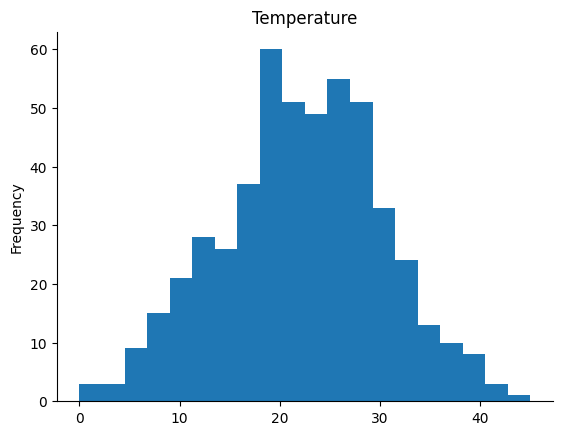

In [ ]:
# @title Temperature
df['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
#Splitting the model
X = np.array(df.Temperature.values)
y = np.array(df.Revenue.values)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.05,random_state=42)

In [ ]:
#Choosing the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,random_state=42)

In [ ]:
#Training the model
model.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

<ipython-input-90-547ec1c0d63a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
y_test

array([659.8732869 , 623.2487008 , 559.1358692 , 497.7523178 ,
       627.9018411 , 300.9322734 , 278.7319615 , 319.3494624 ,
       483.4897686 , 683.5447809 , 737.8008241 , 401.9247923 ,
       441.0029443 , 654.7474611 ,  32.54661902, 221.400252  ,
       524.7463643 , 528.3804165 , 587.2212461 , 643.0909437 ,
       584.399945  , 809.3525195 , 607.8391938 , 596.8767502 ,
       918.3912316 ])

In [ ]:
y_pred = model.predict(X_test.reshape(-1,1))
print(y_pred)

[695.5079135  614.85042702 599.0374541  499.92216131 592.64574485
 289.73562477 291.43195065 300.26575181 529.6757077  700.1452653
 728.78075739 396.870627   427.29594775 678.9779488   31.31009825
 209.75617764 535.91243248 571.9030127  572.23229116 695.5079135
 545.20743615 776.99351213 711.28436524 550.52490964 918.2361997 ]


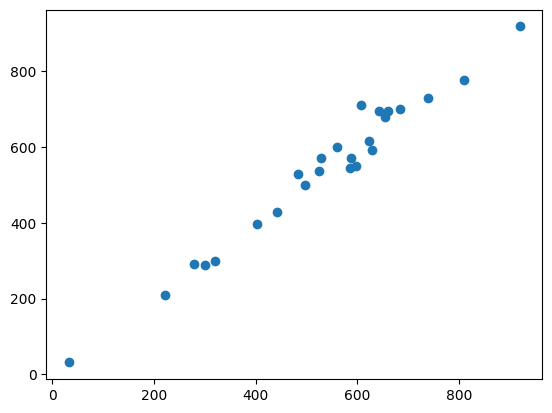

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
pred = pd.DataFrame({"Actual":y_test.reshape(-1),"Predicted":y_pred.reshape(-1)})

In [ ]:
pred.head()

,Actual,Predicted
0,659.873287,695.507913
1,623.248701,614.850427
2,559.135869,599.037454
3,497.752318,499.922161
4,627.901841,592.645745


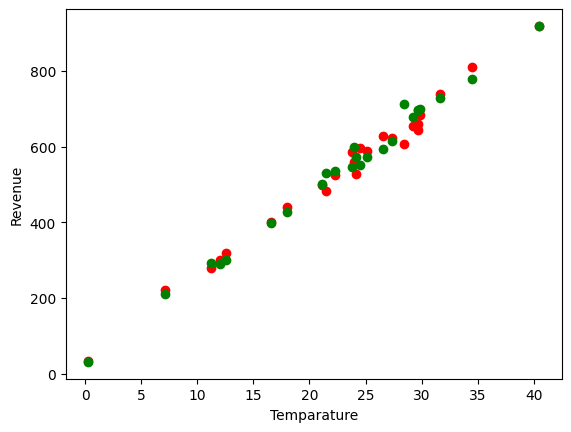

In [ ]:
plt.scatter(X_test,y_test,color='red')
plt.scatter(X_test,y_pred,color='green')
plt.xlabel("Temparature")
plt.ylabel('Revenue')
plt.show()

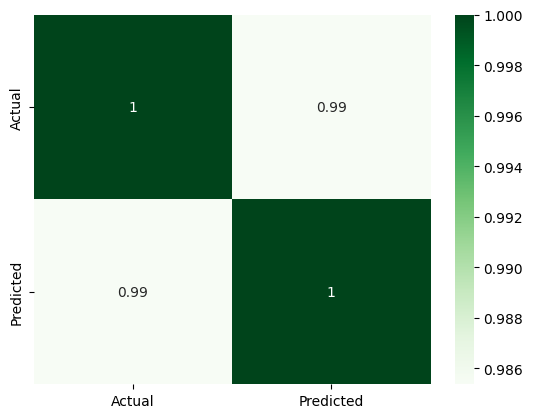

In [ ]:
sns.heatmap(pred.corr(),annot=True,cmap='Greens')
plt.show()

In [ ]:
#Accuracy
r2_score(y_test,y_pred)

0.9683685523561248